<a href="https://colab.research.google.com/github/narinthakan/pythonProject1/blob/master/sklearn_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

เป็นกลุ่มของหลักการเรียนรู้ของเครื่องที่เอาไว้ใช้ตอบคำถามว่าเป็น A หรือ B

* Is it A or B?  two-class classification

* Is it A or B or C or ... ? multi-class classification

เช่น

* email ที่มีข้อความประเภทนี้เป็น spam **ใช่** หรือ **ไม่ใช่**

* ลูกค้าที่เงินเติมซื้อเกมมากกว่า 2000 บาทต่อสัปดาห์มีอายุอยู่ในช่วง **5-24 ปี** หรือ **25-44 ปี** หรือ **45-64 ปี** หรือ **65-130 ปี**

หลักการเรียนรู้ของเครื่องที่ใช้สร้าง model เพื่อตอบคำถามสำหรับ scikit-learn ที่จะนำเสนอในบทนี้ คือ
Decision Tree

## Decision Trees

สร้าง model โดยการเลือกตัดสินใจเป็นลำดับชั้น โดยเลือก feature หรือ column ที่มีความสำคัญที่สุดก่อน แล้วค่อยสร้างลำดับชั้นของการตัดสินใจไปเรื่อย จนกระทั่งตัดสินใจได้ว่า ข้อมูลนั้นควรเป็นประเภทใด

โครงสร้างการตัดสินใจนี้เมื่อนำมาแสดงเป็นลำดับชั้นจะเห็นเป็นต้นไม้ จึงเรียกว่า Decision Tree


ตัวอย่างข้อมูลการเข้าเรียนของนักศึกษาวิทยาการคอมพิวเตอร์คนหนึ่ง เก็บข้อมูลทั้งหมด 14 วัน ดังตาราง

| สภาพอากาศ      | อุณหภูมิ         | ความชื้น  | ลม    | เข้าเรียน |
| :------------: | :-----------: | :-----: | :---: | :---: |
| ท้องฟ้าแจ่มใส     | 29            | 85      | ไม่มี   | เข้า   |
| ท้องฟ้าแจ่มใส     | 26            | 90      | มี     | ไม่เข้า |
| มืดคลึ้ม          | 28            | 78      | ไม่มี   | เข้า   |
| ฝนตก           | 21            | 96      | ไม่มี   | เข้า   |
| ฝนตก           | 20            | 80      | ไม่มี   | เข้า   |
| ฝนตก           | 18            | 70      | มี     | ไม่เข้า |
| มืดคลึ้ม          | 17            | 65      | มี     | เข้า   |
| ท้องฟ้าแจ่มใส     | 22            | 95      | ไม่มี   | ไม่เข้า |
| ท้องฟ้าแจ่มใส     | 20            | 70      | ไม่มี   | เข้า   |
| ฝนตก           | 23            | 80      | ไม่มี   | เข้า   |
| ท้องฟ้าแจ่มใส     | 23            | 70      | มี     | เข้า   |
| มืดคลึ้ม          | 22            | 90      | มี     | เข้า   |
| มืดคลึ้ม          | 27            | 75      | ไม่มี   | เข้า   |
| ฝนตก           | 21            | 80      | มี     | ไม่เข้า |

ref: ข้อมูล csv

* http://gg.gg/csubu-habit
* http://projectcs.sci.ubu.ac.th/downloads/datasets/raw/master/csubu-habit.csv

คำศัพท์:

* สภาพอากาศ - Overlook
* อุณหภูมิ - Temperature
* ความชื้น - Humidity
* ลม - Wind
* เข้าเรียน - Present

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("http://gg.gg/csubu-habit")
df.head()

,Overlook,Temperature,Humidity,Wind,Present
0,ท้องฟ้าแจ่มใส,29,85,ไม่มี,เข้า
1,ท้องฟ้าแจ่มใส,26,90,มี,ไม่เข้า
2,มืดคลึ้ม,28,78,ไม่มี,เข้า
3,ฝนตก,21,96,ไม่มี,เข้า
4,ฝนตก,20,80,ไม่มี,เข้า


In [ ]:
df.sort_values(by=['Present'])

,Overlook,Temperature,Humidity,Wind,Present
0,ท้องฟ้าแจ่มใส,29,85,ไม่มี,เข้า
2,มืดคลึ้ม,28,78,ไม่มี,เข้า
3,ฝนตก,21,96,ไม่มี,เข้า
4,ฝนตก,20,80,ไม่มี,เข้า
6,มืดคลึ้ม,17,65,มี,เข้า
8,ท้องฟ้าแจ่มใส,20,70,ไม่มี,เข้า
9,ฝนตก,23,80,ไม่มี,เข้า
10,ท้องฟ้าแจ่มใส,23,70,มี,เข้า
11,มืดคลึ้ม,22,90,มี,เข้า
12,มืดคลึ้ม,27,75,ไม่มี,เข้า


**หมายเหตุ:** ถ้า _มืดคลื้ม_ แล้ว _เข้าเรียน_ 100% ไม่ว่า อุณหภูมิ ความชื้น หรือ ลม จะเป็นเช่นไร

In [ ]:
df[ df.Overlook == 'มืดคลึ้ม' ]

,Overlook,Temperature,Humidity,Wind,Present
2,มืดคลึ้ม,28,78,ไม่มี,เข้า
6,มืดคลึ้ม,17,65,มี,เข้า
11,มืดคลึ้ม,22,90,มี,เข้า
12,มืดคลึ้ม,27,75,ไม่มี,เข้า


In [ ]:
df2 = df[ df.Overlook != 'มืดคลึ้ม' ].sort_values(by='Present')
df2

,Overlook,Temperature,Humidity,Wind,Present
0,ท้องฟ้าแจ่มใส,29,85,ไม่มี,เข้า
3,ฝนตก,21,96,ไม่มี,เข้า
4,ฝนตก,20,80,ไม่มี,เข้า
8,ท้องฟ้าแจ่มใส,20,70,ไม่มี,เข้า
9,ฝนตก,23,80,ไม่มี,เข้า
10,ท้องฟ้าแจ่มใส,23,70,มี,เข้า
1,ท้องฟ้าแจ่มใส,26,90,มี,ไม่เข้า
5,ฝนตก,18,70,มี,ไม่เข้า
7,ท้องฟ้าแจ่มใส,22,95,ไม่มี,ไม่เข้า
13,ฝนตก,21,80,มี,ไม่เข้า


ข้อมูล column ไหน? บอกว่านักศึกษาคนนี้จะเข้าเรียนได้แม่นมากกว่า

In [ ]:
df2[ df2.Wind == 'ไม่มี' ]

,Overlook,Temperature,Humidity,Wind,Present
0,ท้องฟ้าแจ่มใส,29,85,ไม่มี,เข้า
3,ฝนตก,21,96,ไม่มี,เข้า
4,ฝนตก,20,80,ไม่มี,เข้า
8,ท้องฟ้าแจ่มใส,20,70,ไม่มี,เข้า
9,ฝนตก,23,80,ไม่มี,เข้า
7,ท้องฟ้าแจ่มใส,22,95,ไม่มี,ไม่เข้า


In [ ]:
data = df.copy()

data['Overlook'] = data.Overlook.astype('category')
data['overlook'] = data.Overlook.cat.codes
data['อากาศ'] = data.Overlook.cat.codes

data['Wind'] = data.Wind.astype('category')
data['wind'] = data.Wind.cat.codes
data['ลม'] = data.Wind.cat.codes

data['อุณหภูมิ'] = data.Temperature
data['ความชื้น'] = data.Humidity

data['Present'] = data.Present.astype('category')

In [ ]:
data.columns
data.sort_values(by='Present')

,Overlook,Temperature,Humidity,Wind,Present,overlook,อากาศ,wind,ลม,อุณหภูมิ,ความชื้น
0,ท้องฟ้าแจ่มใส,29,85,ไม่มี,เข้า,0,0,1,1,29,85
2,มืดคลึ้ม,28,78,ไม่มี,เข้า,2,2,1,1,28,78
3,ฝนตก,21,96,ไม่มี,เข้า,1,1,1,1,21,96
4,ฝนตก,20,80,ไม่มี,เข้า,1,1,1,1,20,80
6,มืดคลึ้ม,17,65,มี,เข้า,2,2,0,0,17,65
8,ท้องฟ้าแจ่มใส,20,70,ไม่มี,เข้า,0,0,1,1,20,70
9,ฝนตก,23,80,ไม่มี,เข้า,1,1,1,1,23,80
10,ท้องฟ้าแจ่มใส,23,70,มี,เข้า,0,0,0,0,23,70
11,มืดคลึ้ม,22,90,มี,เข้า,2,2,0,0,22,90
12,มืดคลึ้ม,27,75,ไม่มี,เข้า,2,2,1,1,27,75


In [ ]:
# เอา data มาแยกเป็น feature matrix (X) กับ target vector (y)
columns = ['อากาศ', 'อุณหภูมิ', 'ความชื้น', 'ลม']
X = data[ columns ].values
y = data.Present.cat.codes

In [ ]:
y

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
dtype: int8

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

ผลลัพธ์ของ Tree

Don't forget to `pip install graphviz`

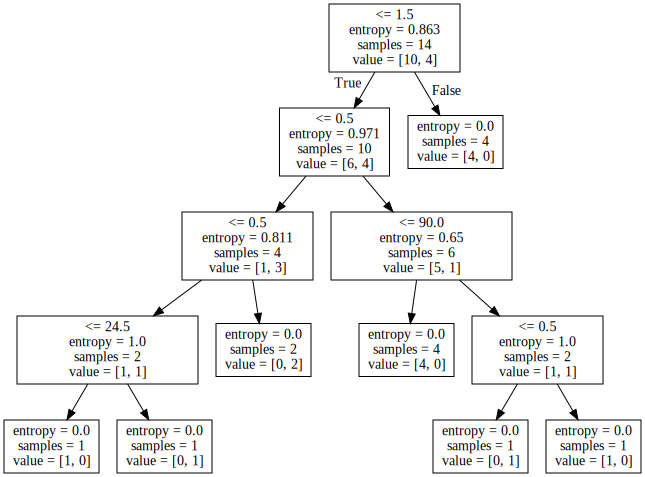

In [ ]:
import graphviz
import sklearn
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, feature_names=columns)
graphviz.Source(dot_data)
#  อากาศ  อุณ  ชื้น   ลม
# [ 2,    120, 95,  1]

1) if อากาศ <= 1.5 and ลม <= 0.5 and ความชื้่น <= 75.0 and อากาศ <= 0.5 then Present = "ไม่เข้า"

2) if อากาศ <= 1.5 and ลม <= 0.5 and ความชื้่น > 75.0 then Present = "เข้า"

3)...

4)...

5)...

In [ ]:
def code(column, text):
    return [ i for i in range(len(column.cat.categories)) if column.cat.categories[i] == text ][0]


#d = [ 'ท้องฟ้าแจ่มใส', 20, 70, 'ไม่มี' ]
#print(data.Overlook.cat.categories)
#print(data.Wind.cat.categories)
#print(data.Present.cat.categories)
#print(data.Present.cat.categories.get_value('ไม่เข้า'))

def dx(x):
    return [ code(data.Overlook, x[0]), x[1], x[2], code(data.Wind, x[3]) ]


def เข้าเรียน(x):
    d = dx(x)
    print(d)
    p = tree.predict([ d ])
    print(data.Present.cat.categories[p[0]])

In [ ]:
#['อากาศ', 'อุณหภูมิ', 'ความชื้น', 'ลม']
เข้าเรียน([ 'มืดคลึ้ม', 120, 70, 'ไม่มี' ])

[2, 120, 70, 1]
เข้า


In [ ]:
เข้าเรียน([ 'ฝนตก', 50, 20, 'ไม่มี' ])

[1, 50, 20, 1]
เข้า


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size = 0.3, random_state=0)
tree = DecisionTreeClassifier(criterion = "entropy")
tree = tree.fit(Xtrain, ytrain)
ypred = tree.predict(Xtest)



วิเคราะห์ความถูกต้อง

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(ypred, ytest))


0.2


แสดงผลลัพธ์ด้วย confusion matrix

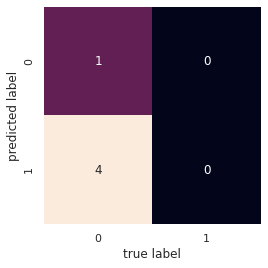

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
if outlook == "sunny" and humidity =="high":
  print("no")

if outlook == "sunny" and humidity =="normal":
  print("yes")


NameError: ignored